# Logistic Regression

*Logistic regression models the probabilities for classification problems with two possible outcomes. It's an extension of the linear regression model for classification problems.*

Logistic regression is named for the function used at the core of the method, the logistic function.

The logistic function, also called the sigmoid function was developed by statisticians to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment. It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

Ref: https://christophm.github.io/interpretable-ml-book/logistic.html

## What is Wrong with Linear Regression for Classification?

The linear regression model can work well for regression, but fails for classification. Why is that? In case of two classes, you could label one of the classes with 0 and the other with 1 and use linear regression. Technically it works and most linear model programs will spit out weights for you. But there are a few problems with this approach:

A linear model does not output probabilities, but it treats the classes as numbers (0 and 1) and fits the best hyperplane (for a single feature, it is a line) that minimizes the distances between the points and the hyperplane. So it simply interpolates between the points, and you cannot interpret it as probabilities.

A linear model also extrapolates and gives you values below zero and above one. This is a good sign that there might be a smarter approach to classification.

Since the predicted outcome is not a probability, but a linear interpolation between points, there is no meaningful threshold at which you can distinguish one class from the other. A good illustration of this issue has been given on Stackoverflow.

Linear models do not extend to classification problems with multiple classes. You would have to start labeling the next class with 2, then 3, and so on. The classes might not have any meaningful order, but the linear model would force a weird structure on the relationship between the features and your class predictions. The higher the value of a feature with a positive weight, the more it contributes to the prediction of a class with a higher number, even if classes that happen to get a similar number are not closer than other classes.

### Logistic Regression Formula

A solution for classification is logistic regression. Instead of fitting a straight line or hyperplane, the logistic regression model uses the logistic function to squeeze the output of a linear equation between 0 and 1. The logistic function is defined as:

$\text{logistic}(x)=\frac{1}{1+exp(-x)}$

And it looks like this:

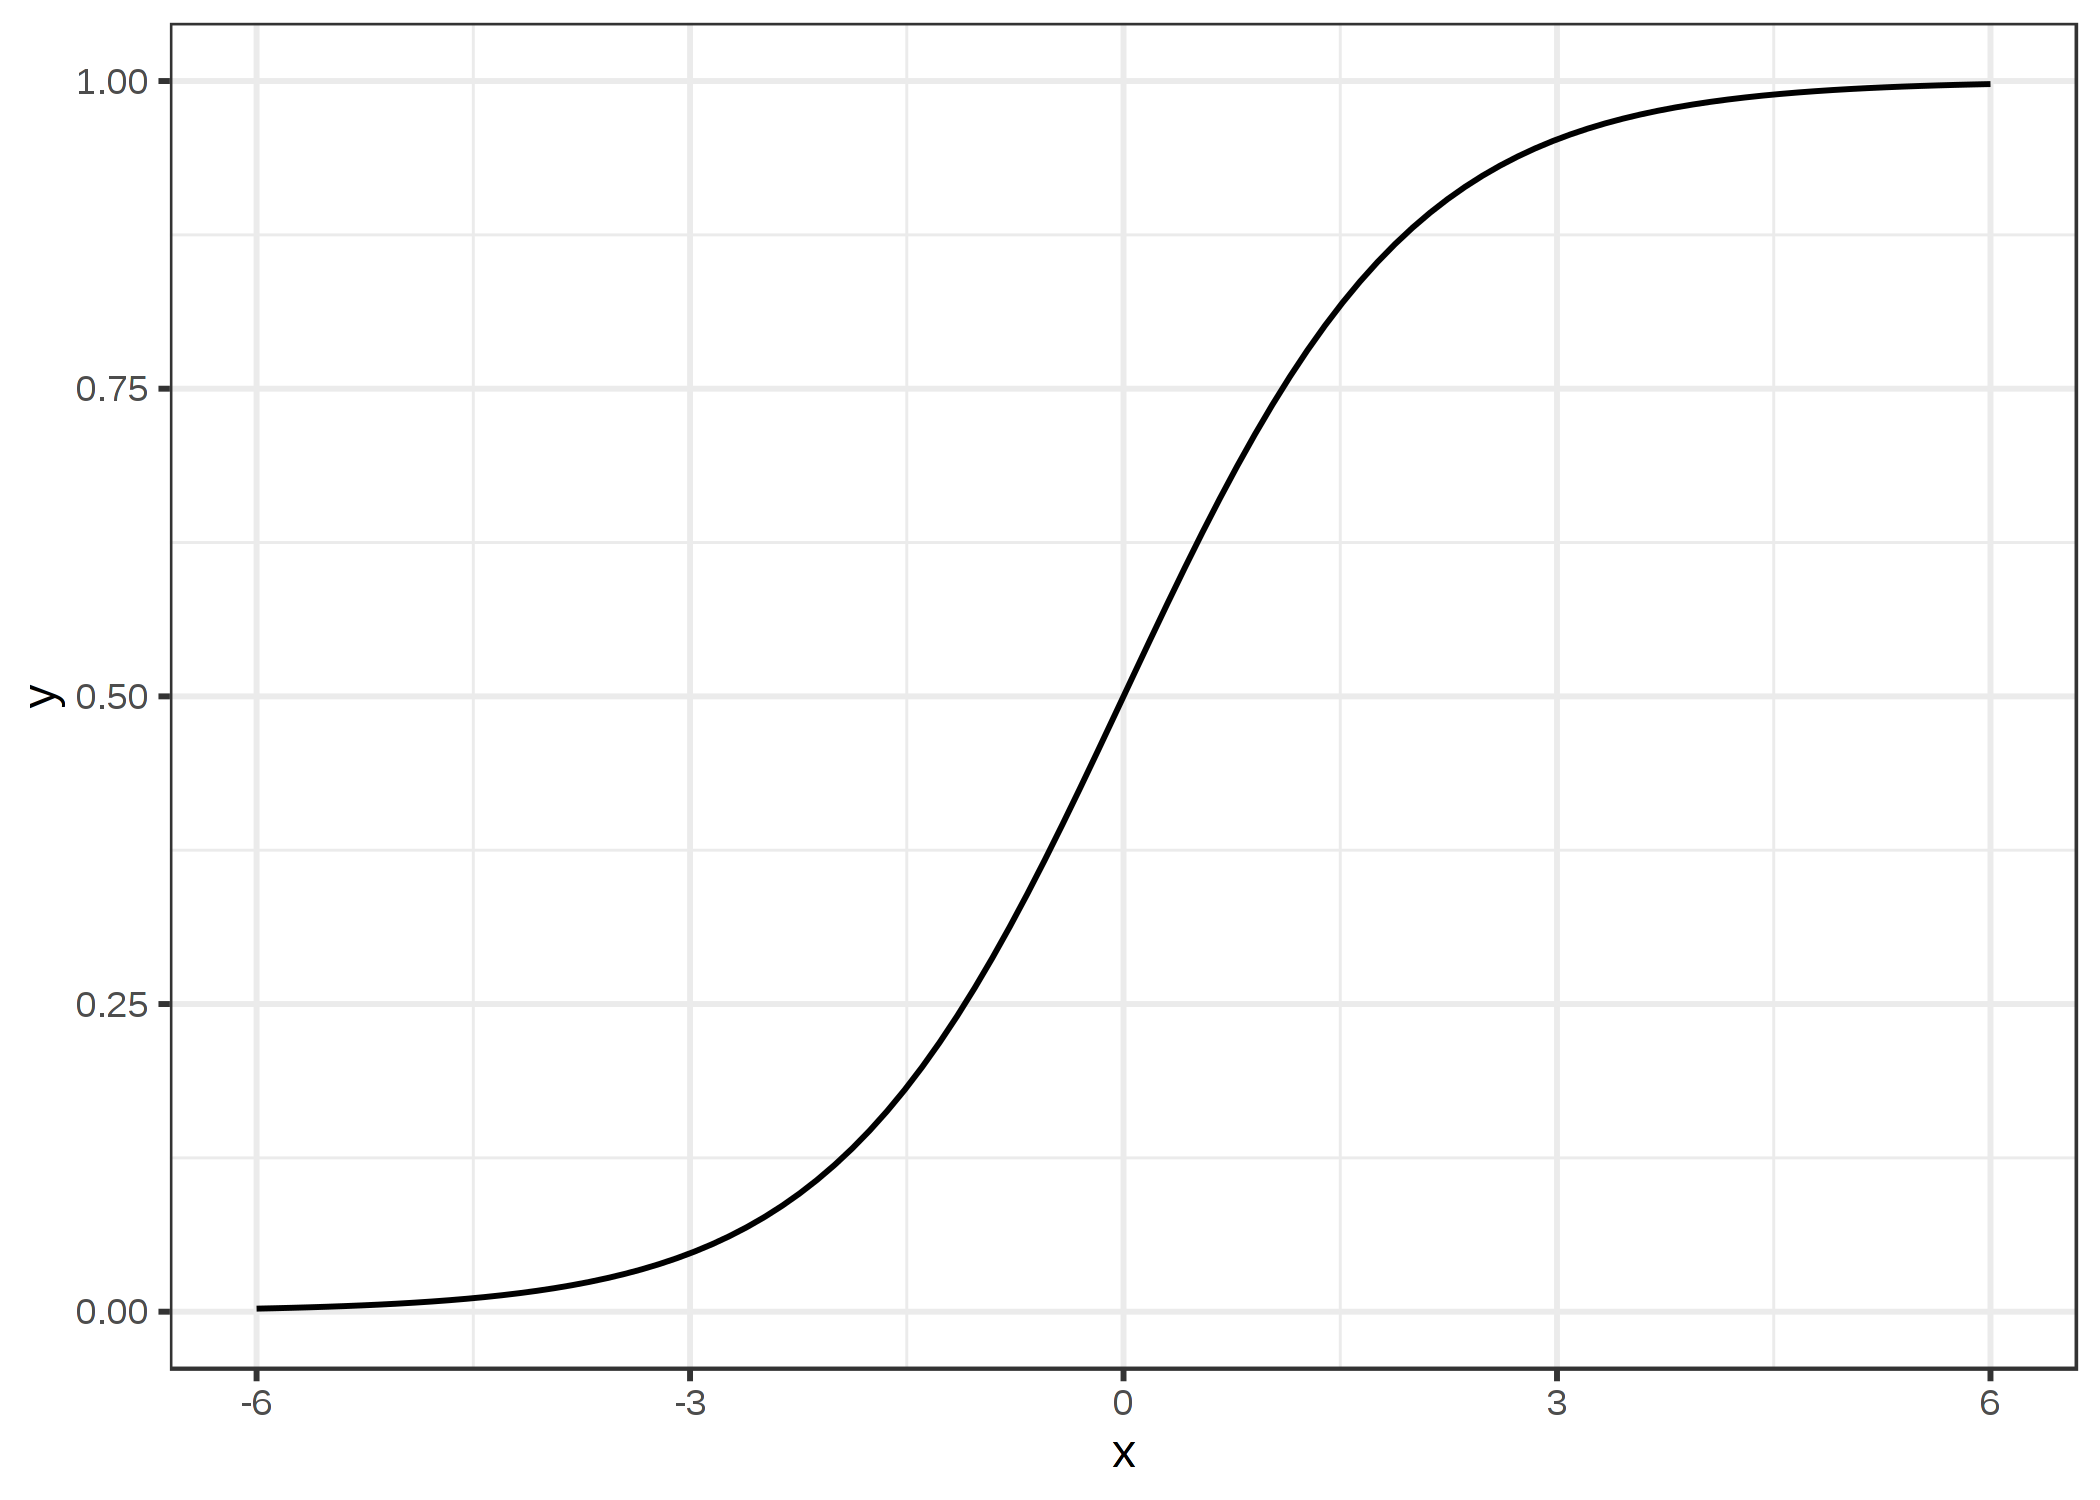

The step from linear regression to logistic regression is kind of straightforward. In the linear regression model, we have modelled the relationship between outcome and features with a linear equation:

$\hat{y}^{(i)}=\beta_{0}+\beta_{1}x^{(i)}_{1}+\ldots+\beta_{p}x^{(i)}_{p}$

For classification, we prefer probabilities between 0 and 1, so we wrap the right side of the equation into the logistic function. This forces the output to assume only values between 0 and 1.

$P(y^{(i)}=1)=\frac{1}{1+exp(-(\beta_{0}+\beta_{1}x^{(i)}_{1}+\ldots+\beta_{p}x^{(i)}_{p}))}$ 

Classification works better with logistic regression and we can use 0.5 as a threshold in both cases. The inclusion of additional points does not really affect the estimated curve.

## Cost / Loss function

Ref: https://towardsdatascience.com/optimization-loss-function-under-the-hood-part-ii-d20a239cde11

Linear regression uses Least Squared Error as loss function that gives a convex graph and then we can complete the optimization by finding its vertex as global minimum. However, it’s not an option for logistic regression anymore. Since the hypothesis is changed, Least Squared Error will result in a non-convex graph with local minimums by calculating with sigmoid function applied on raw model output.

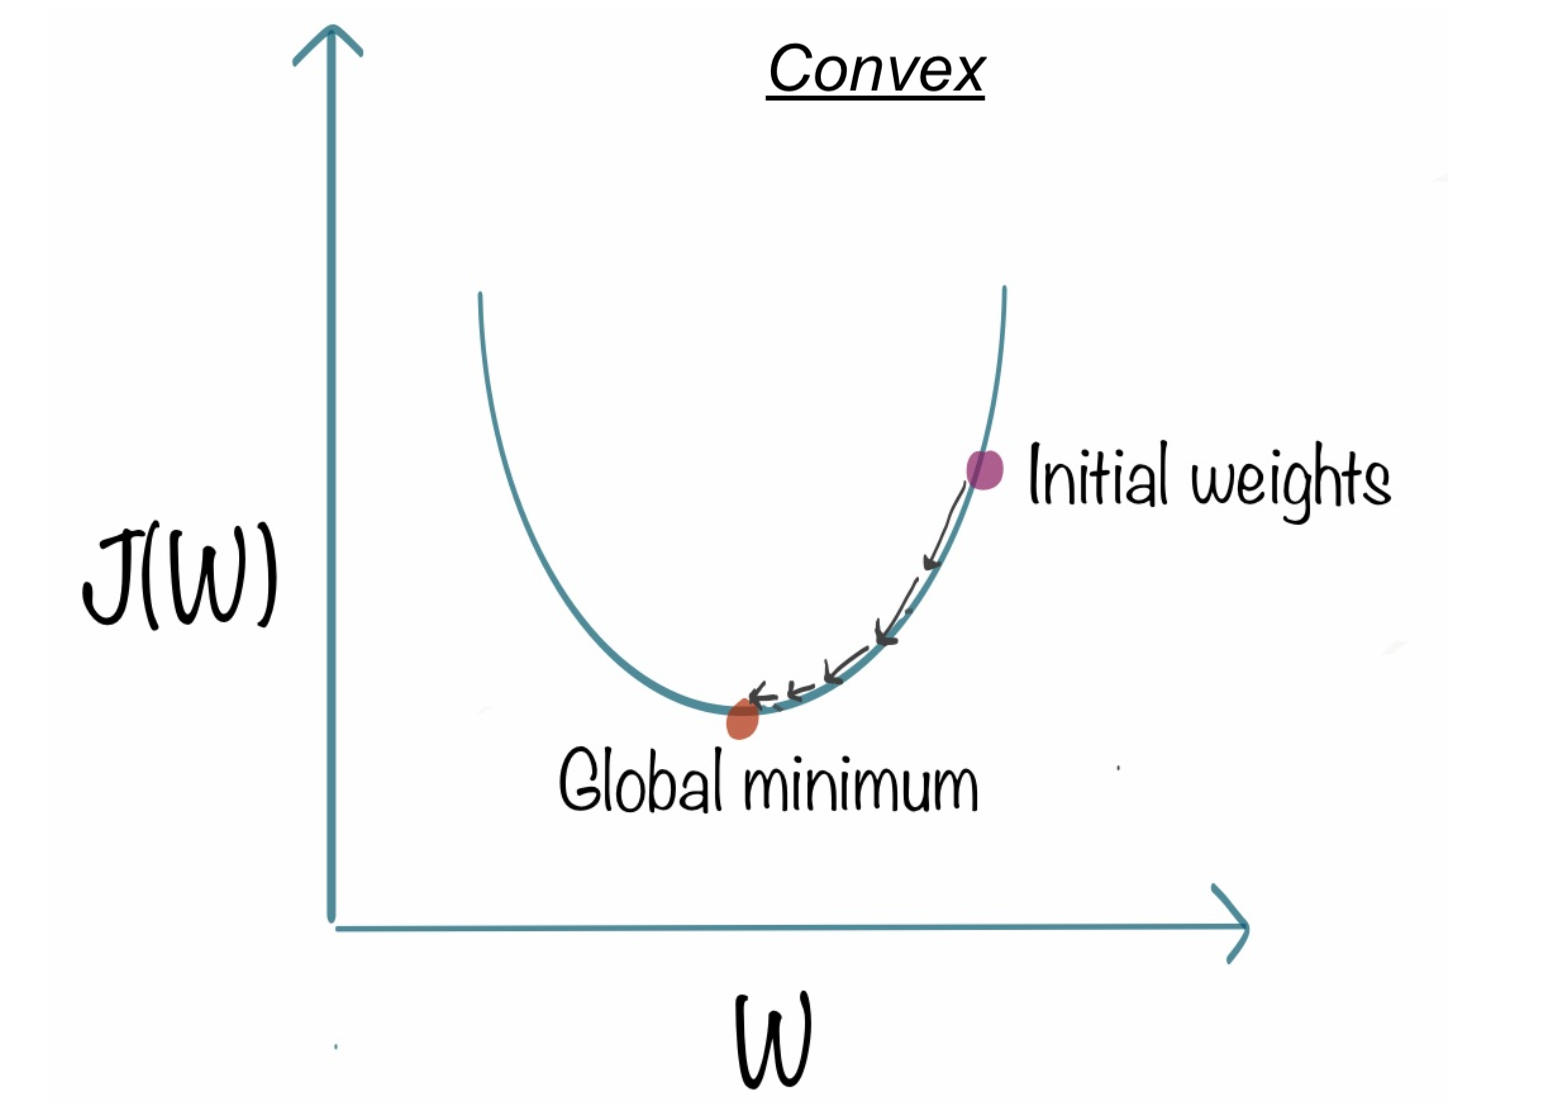
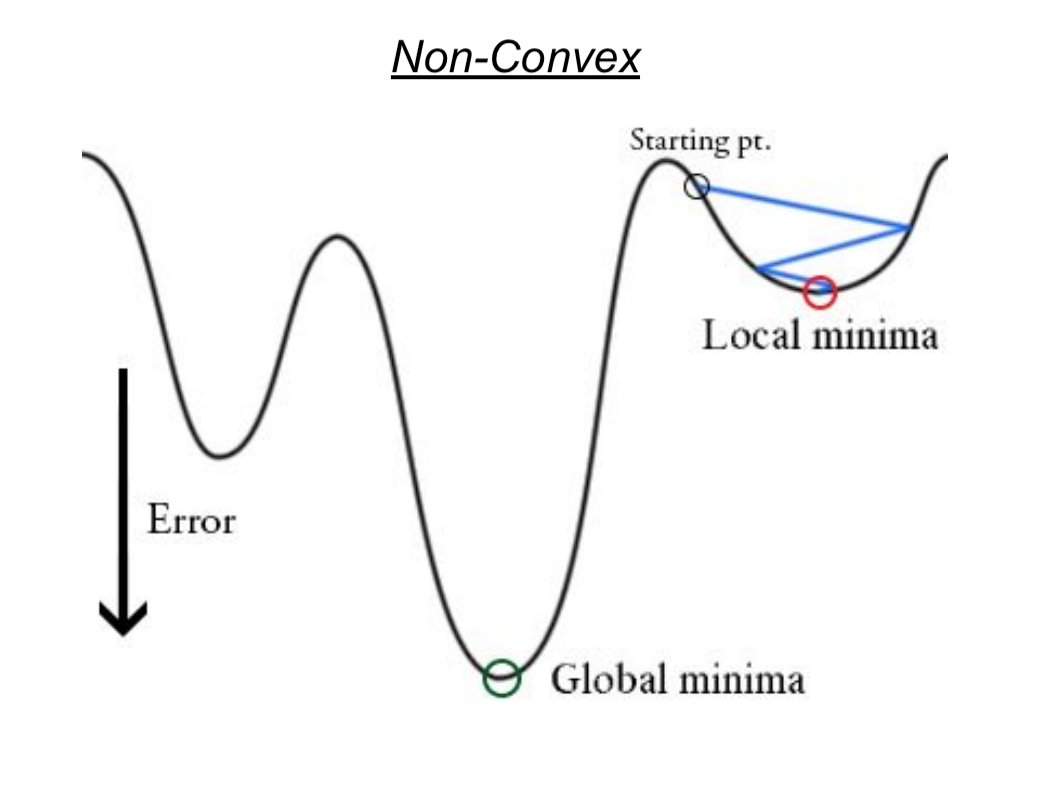

Intuitively, we want to assign more punishment when predicting 1 while the actual is 0 and when predict 0 while the actual is 1. The loss function of logistic regression is doing this exactly which is called **Logistic Loss**. See as below. If y = 1, when prediction = 1, the cost = 0, when prediction = 0, the learning algorithm is punished by a very large cost. Similarly, if y = 0, predicting 0 has no punishment but predicting 1 has a large value of cost.

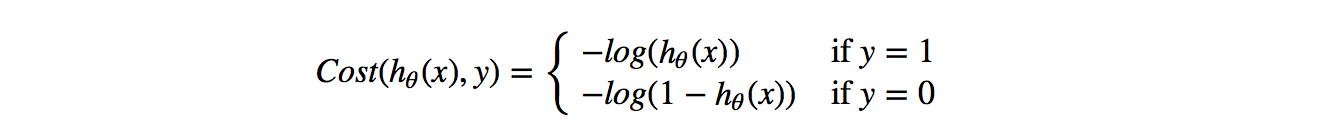

In general

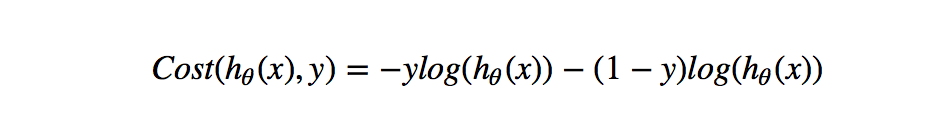

So the cost function of the model is the summation from all training data samples:

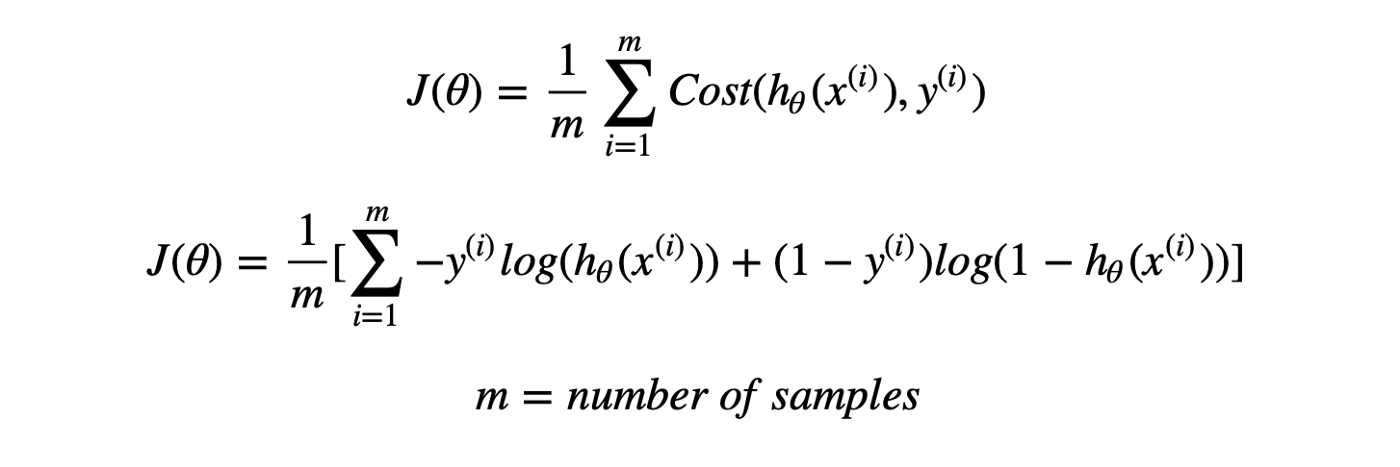

## Gradient Descent

Gradient descent is an optimization algorithm that's used when training a machine learning model. It's based on a convex function and tweaks its parameters iteratively to minimize the loss/cost function to its local minimum. You start by defining the initial parameter's values and from there gradient descent uses calculus to iteratively adjust the values so they minimize the given cost-function.

Imagine you have a machine learning problem and want to train your algorithm with gradient descent to minimize your cost-function J(w, b) and reach its local minimum by tweaking its parameters (w and b). The image below shows the horizontal axes represent the parameters (w and b), while the cost function J(w, b) is represented on the vertical axes. Gradient descent is a convex function.

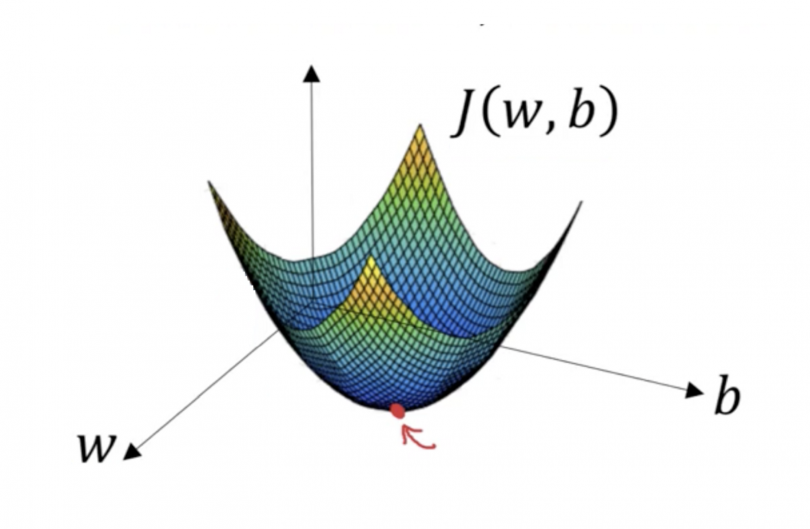

**Gradient Descent Formula to update the parameter**

$w \leftarrow w - \alpha * \frac{\partial J(w, b)}{\partial w}$

$b \leftarrow b - \alpha * \frac{\partial J(w, b)}{\partial w}$

here $\alpha$ is a learning rate.

### Learning Rate

How big the steps are gradient descent takes into the direction of the local minimum are determined by the learning rate, which figures out how fast or slow we will move towards the optimal weights.

For gradient descent to reach the local minimum we must set the learning rate to an appropriate value, which is neither too low nor too high. This is important because if the steps it takes are too big, it may not reach the local minimum because it bounces back and forth between the convex function of gradient descent (see left image below). If we set the learning rate to a very small value, gradient descent will eventually reach the local minimum but that may take a while (see the right image).

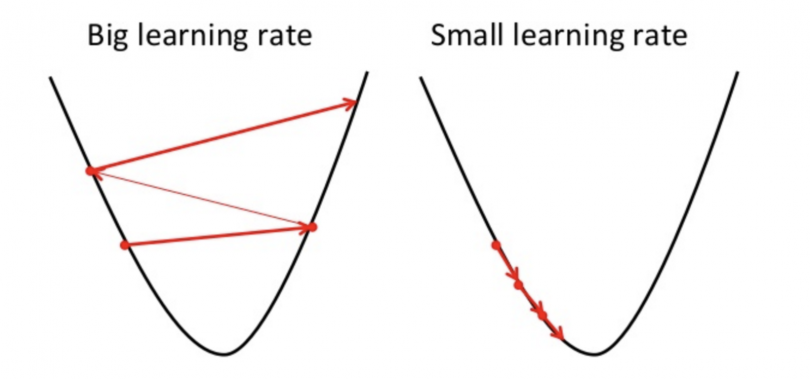

So, the learning rate should never be too high or too low for this reason. You can check if you’re learning rate is doing well by plotting it on a graph.

#### How to know if Gradient Descent works

A good way to make sure gradient descent runs properly is by plotting the cost function as the optimization runs. Put the number of iterations on the x-axis and the value of the cost-function on the y-axis. This helps you see the value of your cost function after each iteration of gradient descent, and provides a way to easily spot how appropriate your learning rate is. You can just try different values for it and plot them all together. The left image below shows such a plot, while the image on the right illustrates the difference between good and bad learning rates.

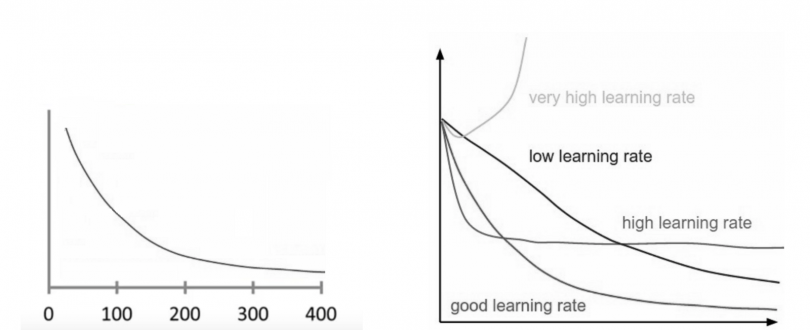

If gradient descent is working properly, the cost function should decrease after every iteration.

When gradient descent can’t decrease the cost-function anymore and remains more or less on the same level, it has converged. The number of iterations gradient descent needs to converge can sometimes vary a lot. It can take 50 iterations, 60,000 or maybe even 3 million, making the number of iterations to convergence hard to estimate in advance.

### Batch Gradient Descent

Batch gradient descent, also called vanilla gradient descent, calculates the error for each example within the training dataset, but only after all training examples have been evaluated does the model get updated. This whole process is like a cycle and it's called a training epoch.

Some advantages of batch gradient descent are its computational efficient, it produces a stable error gradient and a stable convergence. Some disadvantages are the stable error gradient can sometimes result in a state of convergence that isn’t the best the model can achieve. It also requires the entire training dataset be in memory and available to the algorithm.

### Stochastic Gradient Descent

By contrast, stochastic gradient descent (SGD) does this for each training example within the dataset, meaning it updates the parameters for each training example one by one. Depending on the problem, this can make SGD faster than batch gradient descent. One advantage is the frequent updates allow us to have a pretty detailed rate of improvement.

The frequent updates, however, are more computationally expensive than the batch gradient descent approach. Additionally, the frequency of those updates can result in noisy gradients, which may cause the error rate to jump around instead of slowly decreasing.

### Mini-batch Gradient Descent

Mini-batch gradient descent is the go-to method since it’s a combination of the concepts of SGD and batch gradient descent. It simply splits the training dataset into small batches and performs an update for each of those batches. This creates a balance between the robustness of stochastic gradient descent and the efficiency of batch gradient descent.

Common mini-batch sizes range between 50 and 256, but like any other machine learning technique, there is no clear rule because it varies for different applications. This is the go-to algorithm when training a neural network and it is the most common type of gradient descent within deep learning.

# Logistic Regression in Code

Ref: 
1. https://opetundeadepoju.medium.com/a-step-by-step-tutorial-on-coding-neural-network-logistic-regression-model-from-scratch-5f9025bd3d6
2. http://cs230.stanford.edu/fall2018/section_files/section3_soln.pdf
3. https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc and its code: https://github.com/SSaishruthi/LogisticRegression_Vectorized_Implementation/blob/master/Logistic_Regression.ipynb

## Binary Classification Problem

### Breast Cancer dataset

**Dataset Description**

we have a breast cancer dataset with X being the tumor size and y being whether the lump is malignant(cancerous) or benign(non-cancerous). Whenever a patient visits, your job is to tell him/her whether the lump is malignant(0) or benign(1) given the size of the tumor. There are only two classes in this case.

In [146]:
%matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [147]:
class LogisticRegression:
    """docstring for LogisticRegression"""

    def __init__(self, learning_rate=0.01, epochs=50000):
        self.learning_rate = learning_rate
        self.epochs = epochs

    # define sigmoid function
    def sigmoid(self, z):
        '''
        Compute the sigmoid activation of the input
        param z: input data coming out from one layer of the model ()
        return: apply sigmoid
        '''
        sig = 1.0 / (1 + np.exp(-z))
        return sig

    def compute_accuracy(self, a, Y):
        y_pred = a.round()
        val = y_pred == Y
        return np.sum(val) / Y.shape[0]

    def train(self, X, Y):
        '''
        train the model
        param: X: input features of size (number of training data * number of features) = (m, n)
               Y: ground truth value of size (number of training data, 1 = (m, 1)
        '''

        # weight and bias initialization
        # weight dim [number of features, 1] = (n, 1)
        # bias is a scalar value but python can broadcast while calculating
        self.w = np.zeros((X.shape[1], 1))
        self.b = 0

        losses = []
        accuracy_data = []

        for i in range(self.epochs):
            m = X.shape[0]

            # forward propagation
            z = np.dot(X, self.w) + self.b
            a = self.sigmoid(z)

            loss = - 1 / m * (np.sum(Y * np.log(a) + (1 - Y) * np.log(1 - a)))
            accuracy = self.compute_accuracy(a, Y)

            # gradient or back propagation
            dZ = a - Y
            dW = (1 / m) * np.dot(X.T, dZ)
            db = (1 / m) * np.sum(dZ)

            # update weight and bias
            self.w -= self.learning_rate * dW
            self.b -= self.learning_rate * db

            losses.append(loss)
            accuracy_data.append(accuracy)

            print(f'epoch: {i} \t loss: {loss} \t accuracy: {accuracy} \t')

        self.plot(losses, accuracy_data, self.epochs)

    def predict(self, X):
        y_pred = self.sigmoid(np.dot(X, self.w) + self.b)
        return y_pred.round()

    def plot(self, loss, accuracy, epoch):
        # Ref https://www.pluralsight.com/guides/data-visualization-deep-learning-model-using-matplotlib
        fig1 = plt.figure(1)
        epochs = range(1, epoch + 1)
        plt.plot(epochs, loss, 'g', label='Training loss')
        plt.title('Loss Curve')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        # fig1.savefig('loss_curve.png')
        plt.show()

        fig2 = plt.figure(2)
        plt.plot(epochs, accuracy, 'g', label='Training Accuracy')
        # plt.plot(epochs, valid_acc_history, 'b', label='validation Accuracy')
        plt.title('Accuracy Curve')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        # fig2.savefig('accuracy_curve.png')
        plt.show()

In [150]:
def main():
    # prepare the input features and label
    breast_cancer = datasets.load_breast_cancer()
    X = breast_cancer.data
    y = breast_cancer.target

    # standardize the data
    new_X = preprocessing.scale(X)

    y = y.reshape((y.shape[0], 1))

    X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.20, random_state=42)

    # setup model
    model = LogisticRegression(learning_rate=0.1, epochs=200)

    # train the model
    model.train(X_train, y_train)

    # predict the model
    y_pred = model.predict(X_test)

    test_accuracy = (y_pred == y_test).mean()

    print(f'Model test accuracy: {test_accuracy} \t')

epoch: 0 	 loss: 0.6931471805599453 	 accuracy: 0.37142857142857144 	
epoch: 1 	 loss: 0.5264988693660723 	 accuracy: 0.9252747252747253 	
epoch: 2 	 loss: 0.43979142651346015 	 accuracy: 0.9296703296703297 	
epoch: 3 	 loss: 0.38616369374885334 	 accuracy: 0.9318681318681319 	
epoch: 4 	 loss: 0.3490795667020037 	 accuracy: 0.9340659340659341 	
epoch: 5 	 loss: 0.3215513004499303 	 accuracy: 0.9362637362637363 	
epoch: 6 	 loss: 0.3000977424159112 	 accuracy: 0.945054945054945 	
epoch: 7 	 loss: 0.28277731120814154 	 accuracy: 0.9494505494505494 	
epoch: 8 	 loss: 0.26841540284178506 	 accuracy: 0.9516483516483516 	
epoch: 9 	 loss: 0.2562563248896273 	 accuracy: 0.9516483516483516 	
epoch: 10 	 loss: 0.24578979887974617 	 accuracy: 0.9516483516483516 	
epoch: 11 	 loss: 0.23665750239433242 	 accuracy: 0.9560439560439561 	
epoch: 12 	 loss: 0.22859953068913202 	 accuracy: 0.9582417582417583 	
epoch: 13 	 loss: 0.22142215005592294 	 accuracy: 0.9582417582417583 	
epoch: 14 	 loss: 0.21

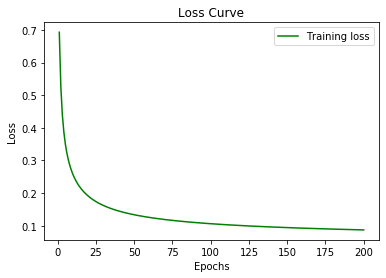

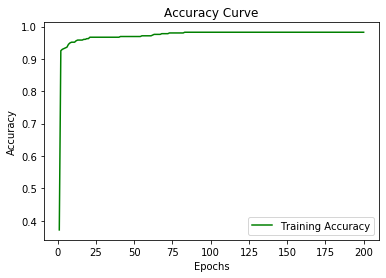

Model test accuracy: 0.9912280701754386 	


In [151]:
if __name__ == "__main__":
    main()